# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [ ]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")


In [ ]:
display(data.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# EXERCICE 1
# INSERT CODE HERE

In [ ]:
#Drop the rows with missing values
print(data.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [ ]:
data_dropna = data.dropna()
print(data_dropna.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [ ]:
#Drop the "name" column
data_drop_name = data_dropna.drop(columns = ["name"])
display(data_drop_name.head())

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


In [ ]:
#Transform the "origin" column (encode it) to represent the following:
#USA = 0, Japan = 1, Europe = 2
data_drop_name["origin_fac"] = data_drop_name["origin"].factorize()[0]

In [ ]:
display(data_drop_name[["origin", "origin_fac"]].value_counts())

origin  origin_fac
usa     0             245
japan   1              79
europe  2              68
Name: count, dtype: int64

# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [ ]:
# Exercice 2
# INSERT CODE HERE

In [ ]:
#Prepare your X and y (mpg column) as a target
X = data_drop_name[["cylinders",	"displacement",	"horsepower",	"weight",	"acceleration",	"model_year",	"origin_fac"]]
y = data_drop_name["mpg"]

In [ ]:
#Split into train and test splits using random state of 42 and a test size of 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 392
The length of the train dataset is   : 313
The length of the test dataset is    : 79


# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [ ]:
# Exercice 3
# INSERT CODE HERE


In [ ]:
#Fit a decision tree (Regression)

from sklearn.tree import DecisionTreeRegressor
modelDTR = DecisionTreeRegressor()
modelDTR.fit(X_train, y_train)

DecisionTreeRegressor()

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE


In [ ]:
#Predict on the xtest set

y_pred = modelDTR.predict(X_test)
print(y_pred)



[23.  19.  38.1 33.  27.  28.  11.  31.5 18.  31.  15.  20.3 15.  28.
 17.  25.8 18.  32.4 31.3 33.5 23.  34.  35.1 17.  31.  28.  20.  18.
 26.  25.  16.  20.2 23.9 28.  14.  31.   9.  23.  14.  12.  14.  28.
 34.  26.  16.  11.  19.  46.6 25.  33.  14.  21.  21.  33.5 38.  16.
 15.5 19.  24.  23.  12.  20.5 28.8 22.  24.  26.  25.5 33.  23.9 14.
 25.  14.  23.  19.  20.5 24.  13.  18.  24. ]


# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [ ]:
# Exercice 5
# INSERT CODE HERE


In [ ]:
from sklearn.metrics import r2_score

x_pred = modelDTR.predict(X_train)
y_pred = modelDTR.predict(X_test)
R2_score_train = r2_score(y_train, x_pred)
R2_score_test = r2_score(y_test, y_pred)


print("R2 Score train: ", R2_score_train)
print("R2 Score test: ", R2_score_test)


R2 Score train:  1.0
R2 Score test:  0.7502831003589203


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [ ]:
# Exercice 6
# INSERT CODE HERE


In [ ]:
display(X)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_fac
0,8,307.0,130.0,3504,12.0,70,0
1,8,350.0,165.0,3693,11.5,70,0
2,8,318.0,150.0,3436,11.0,70,0
3,8,304.0,150.0,3433,12.0,70,0
4,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,0
394,4,97.0,52.0,2130,24.6,82,2
395,4,135.0,84.0,2295,11.6,82,0
396,4,120.0,79.0,2625,18.6,82,0


In [ ]:
#Print each feature with importance % using a method from the DecisionTree object.
X.columns
result = modelDTR.feature_importances_
print(result*100)


[ 0.2541816  62.99505624 17.01779656  6.39053105  2.58439067 10.31475671
  0.44328717]


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

In [ ]:
# EXERCICE 7
# INSERT CODE HERE


In [ ]:
#Plot the decision tree (dataviz)
#Use column names as feature names and a max_depth of only 2

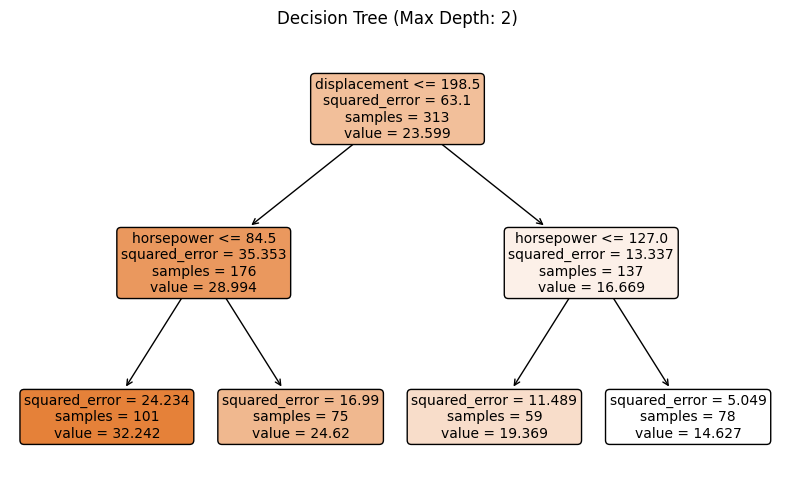

In [ ]:
from sklearn.tree import plot_tree

modelDTR = DecisionTreeRegressor(max_depth=2)
modelDTR.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(modelDTR, feature_names=X.columns, fontsize=10, rounded=True, filled=True)
plt.title("Decision Tree (Max Depth: 2)")
plt.show()

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Exercice 1
# INSERT CODE HERE

In [ ]:
#Drop rows with missing values
#Turn the species column into numeric (encode it) :
#Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
#Turn the island column into numeric (encode it) :
#Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
#Drop rows with missing values
data_dropna = data.dropna()
print(data_dropna.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
#Turn the species column into numeric (encode it) :
#Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2

data_dropna["species_fac"] = data_dropna["species"].factorize()[0]

<ipython-input-57-c51cf6d232e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropna["species_fac"] = data_dropna["species"].factorize()[0]


In [ ]:
display(data_dropna[["species", "species_fac"]].value_counts())

species    species_fac
Adelie     0              146
Gentoo     2              119
Chinstrap  1               68
Name: count, dtype: int64

In [ ]:
#Turn the island column into numeric (encode it) :
#Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

In [ ]:
data_dropna["island_fac"] = data_dropna["island"].factorize()[0]

<ipython-input-61-d6a02a38f3e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dropna["island_fac"] = data_dropna["island"].factorize()[0]


In [ ]:
display(data_dropna[["island", "island_fac"]].value_counts())

island     island_fac
Biscoe     1             163
Dream      2             123
Torgersen  0              47
Name: count, dtype: int64

# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [ ]:
# Exercice 2
# INSERT CODE HERE


In [ ]:
display(data_dropna)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_fac,island_fac
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,0
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2,1


In [ ]:
#Save as variable your X and your y (column "sex")
#Using a random state of 42 and a test size of 0.20, split in training and testing sets.

X = data_dropna[["bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g", "species_fac",	"island_fac"]]
y = data_dropna["sex"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 333
The length of the train dataset is   : 266
The length of the test dataset is    : 67


# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [ ]:
# Exercice 3
# INSERT CODE HERE


In [ ]:
#Fit a decision tree (Classification)

from sklearn.tree import DecisionTreeClassifier
modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier()

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [ ]:
# Exercice 4
# INSERT CODE HERE


In [ ]:
#Predict on the X_test set

y_pred = modelDTC.predict(X_test)
print(y_pred)

['Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female']


# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [ ]:
# Exercice 5
# INSERT CODE HERE

In [ ]:
#Print the accuracy score for the predictions (Train et test)

from sklearn.metrics import accuracy_score

x_pred = modelDTC.predict(X_train)
y_pred = modelDTC.predict(X_test)
acc_score_train = accuracy_score(y_train, x_pred)
acc_score_test = accuracy_score(y_test, y_pred)


print("Accuracy Score train: ", acc_score_train)
print("Accuracy Score test: ", acc_score_test)

Accuracy Score train:  1.0
Accuracy Score test:  0.8805970149253731


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [ ]:
# Exercice 6
# INSERT CODE HERE


In [ ]:
#Print each feature with importance % using a method from the DecisionTree object

X.columns
result = modelDTR.feature_importances_
print(result*100)

[ 0.         78.23267756 21.76732244  0.          0.          0.
  0.        ]


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

In [ ]:
# Exercice 7
# INSERT CODE HERE


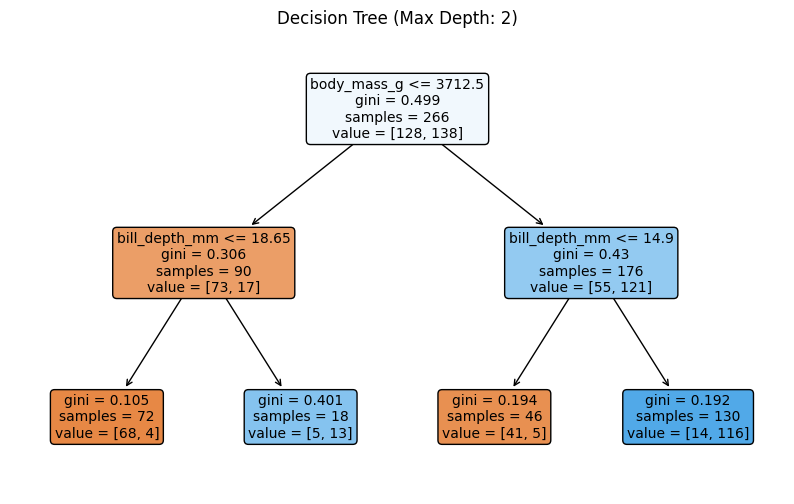

In [ ]:
#Plot the decision tree (dataviz)
#Use column names as feature names and a max_depth of only 2
from sklearn.tree import plot_tree

modelDTC = DecisionTreeClassifier(max_depth=2)
modelDTC.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 6))
plot_tree(modelDTC, feature_names=X.columns, fontsize=10, rounded=True, filled=True)
plt.title("Decision Tree (Max Depth: 2)")
plt.show()


# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [ ]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []
list_of_depths = []

for i in range(1, 11):
  # INSERT CODE HERE
  modelDTC = DecisionTreeClassifier(max_depth= i)
  modelDTC.fit(X_train, y_train)
  y_pred = modelDTC.predict(X_test)
  accuracy_1 = accuracy_score(y_train, x_pred)
  accuracy_2 = accuracy_score(y_test, y_pred)
  list_of_accuracies_train.append(accuracy_1)
  list_of_accuracies_test.append(accuracy_2)
  list_of_depths.append(i)

print(list_of_accuracies_train)
print(list_of_accuracies_test)
print(list_of_depths)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7014925373134329, 0.8208955223880597, 0.835820895522388, 0.8656716417910447, 0.835820895522388, 0.835820895522388, 0.835820895522388, 0.8656716417910447, 0.835820895522388, 0.8656716417910447]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


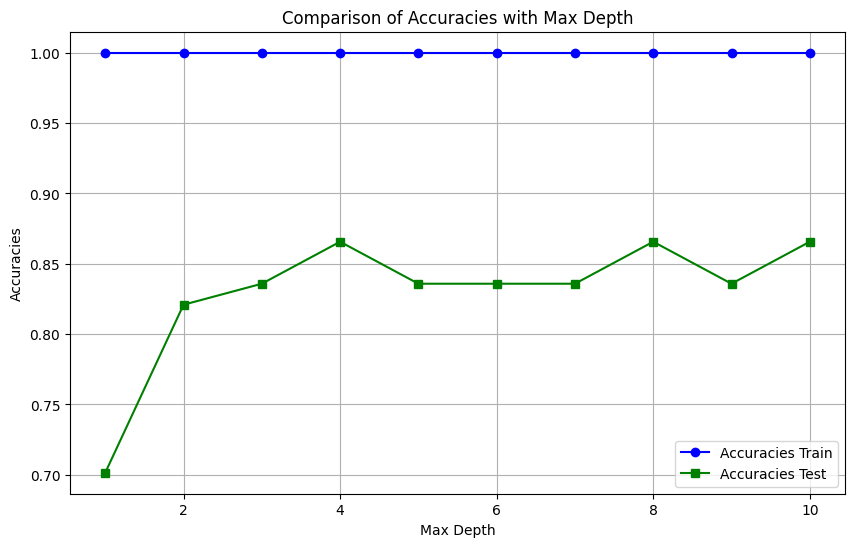

In [ ]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
# INSERT CODE HERE


# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot accuracies_1 vs. max_depth
plt.plot(list_of_depths, list_of_accuracies_train, label='Accuracies Train', marker='o', color='b')

# Plot accuracies_2 vs. max_depth
plt.plot(list_of_depths, list_of_accuracies_test, label='Accuracies Test', marker='s', color='g')

# Set axis labels
plt.xlabel("Max Depth")
plt.ylabel("Accuracies")

# Set title
plt.title("Comparison of Accuracies with Max Depth")

# Add legend
plt.legend()

# Display the plot
plt.grid(True)  # Add a grid for better readability (optional)
plt.show()


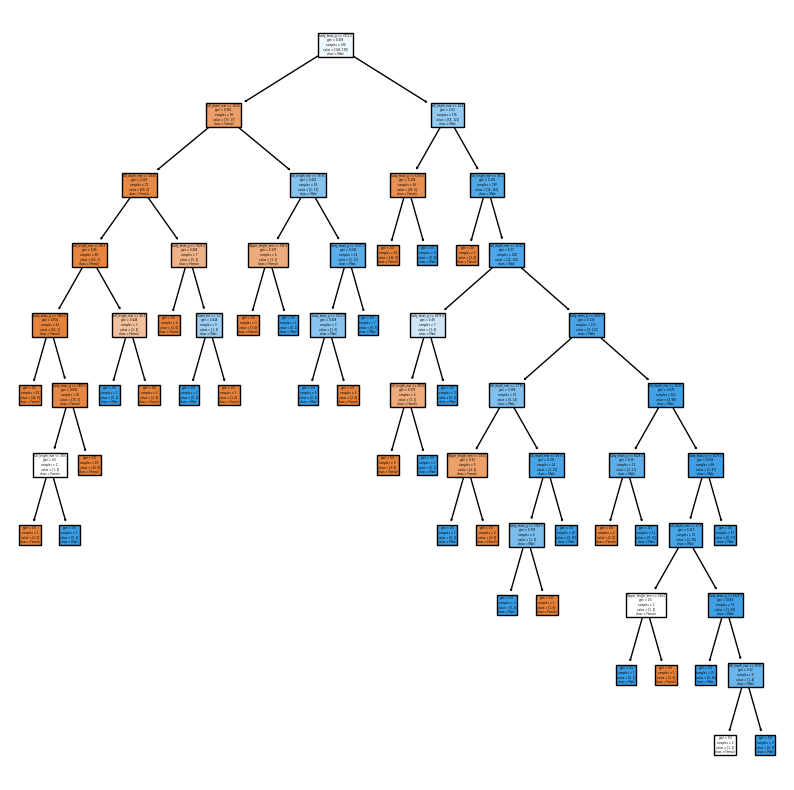

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plot_tree(modelDTC, filled = True,
          class_names = modelDTC.classes_,
          feature_names=X_train.columns )
plt.show()